# DATASET PREPARATION & IMAGE PROCESSING

The purpose of image processing is to equalize the image size so that it can be used as a dataset and change the image to black and white so that it can be processed more quickly in model training

## Install Library

install the libraries required by the code

In [12]:
%pip install scikit-image matplotlib

Note: you may need to restart the kernel to use updated packages.


## Import Library

import libraries that will be used in the code

In [13]:
import os
import random
import matplotlib.pyplot as plt # type: ignore
from skimage import io, transform, util, img_as_uint # type: ignore
from skimage.color import rgb2gray # type: ignore
from skimage.filters import threshold_otsu # type: ignore

## Load Raw Images

Load all the images that will be processed

In [14]:
category = []
images = []

for root, dirs, files in os.walk('../Images/Raw'):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            category.append(os.path.basename(root))

            file_path = os.path.join(root, file)
            img = io.imread(file_path)[:,:,:3]
            images.append(img)

Check the amount of data that has been loaded

In [15]:
print(f'Total Class : {len(set(category))}')
print(f'Total Image : {len(images)}')

Total Class : 3
Total Image : 30


check 9 randomly selected image data

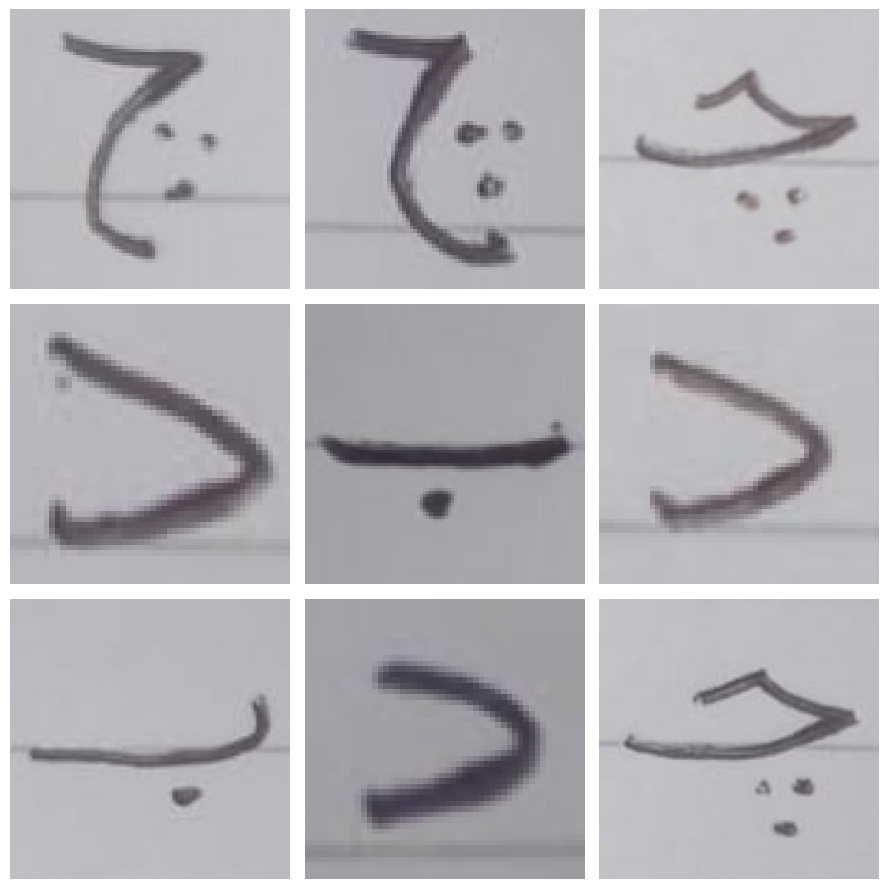

In [16]:
sample_images = random.sample(images, 9)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for ax, img in zip(axes, sample_images):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Change Image Color

change the image color to black and white so that the size is small & easy to process in model training

In [17]:
black_white_images = []

for img in images:
    gray_img = rgb2gray(img)
    threshold = threshold_otsu(gray_img)
    white_black_img = gray_img > threshold
    final = util.invert(white_black_img)
    black_white_images.append(final)

check 9 randomly selected image data

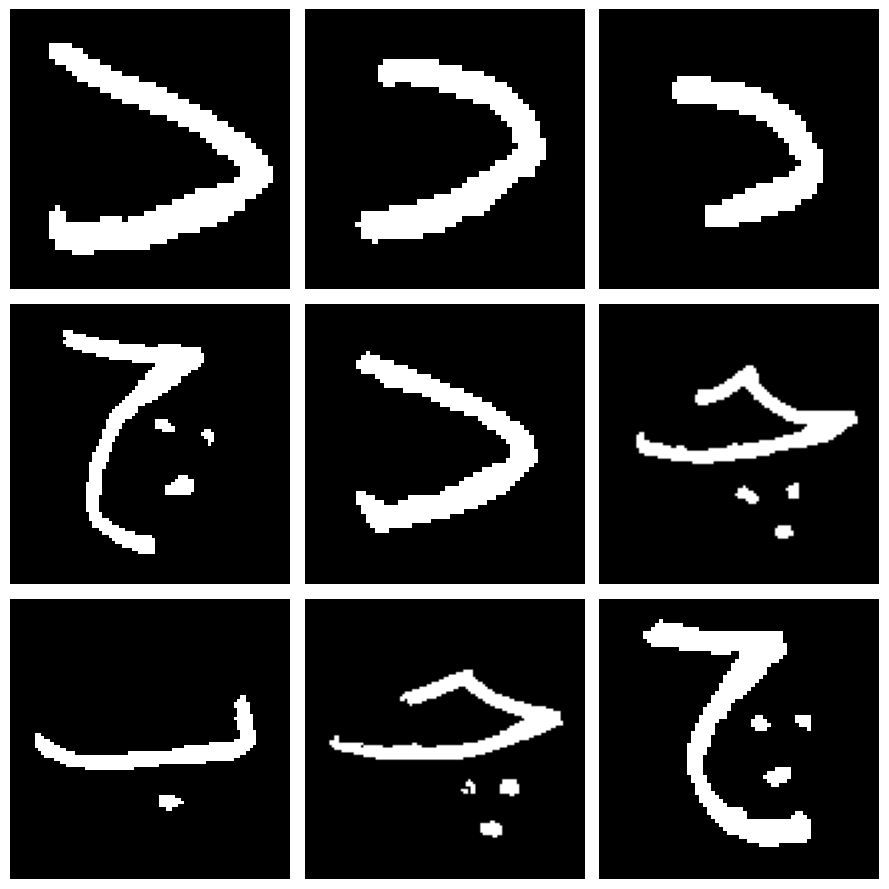

In [18]:
sample_images = random.sample(black_white_images, 9)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for ax, img in zip(axes, sample_images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Resize Images

change the size of the image data to make it the same

In [19]:
resized_images = []
standard_size = (25, 25)

for img in black_white_images:
    resize_img = transform.resize(img, standard_size)
    resized_images.append(resize_img)

check 9 randomly selected image data

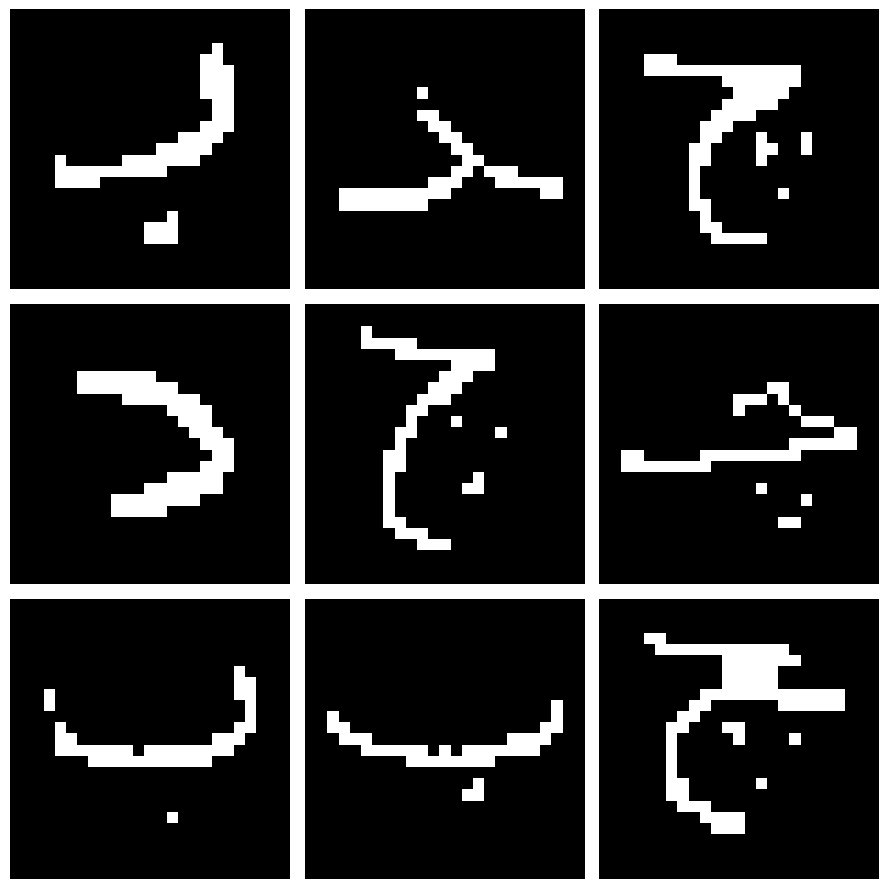

In [20]:
sample_images = random.sample(resized_images, 9)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for ax, img in zip(axes, sample_images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Save Preprocessed Image

save the image processing results in the Processed folder

In [21]:
for x in range(len(resized_images)):
    path = f'../Images/Processed/{category[x]}/{x+1}.png'
    img = resized_images[x]
    io.imsave(path, img_as_uint(img))